In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# 🗂️ Load Dataset

In [3]:
raw_ecommerce = pd.read_csv('Datasets/E-Commerce Insights.csv')

In [11]:
raw_ecommerce.columns = raw_ecommerce.columns.str.lower()

# 📌 Exploratory Data Analysis

### 💡 Descriptive Statistics

In [5]:
# take a look dataset
raw_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  object 
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

In [4]:
# cek missing data
raw_ecommerce.isnull().sum()

Administrative             111
Administrative_Duration    633
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration    639
BounceRates                 74
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           524
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [6]:
# missing data by percentage
round(raw_ecommerce.isna().sum() / len(raw_ecommerce) * 100, 2)

administrative             0.86
administrative_duration    4.89
informational              0.00
informational_duration     0.00
productrelated             0.00
productrelated_duration    4.94
bouncerates                0.57
exitrates                  0.00
pagevalues                 0.00
specialday                 0.00
month                      0.00
operatingsystems           4.05
browser                    0.00
region                     0.00
traffictype                0.00
visitortype                0.00
weekend                    0.00
revenue                    0.00
dtype: float64

In [7]:
# cek duplicate data
raw_ecommerce.duplicated().sum()

711

Terdapat **12.946** baris data, dengan jumlah attribut 18. Dari 18 attribut, ada 5 attribut yang memiliki nilai <i>null</i> diantaranya: <br>
1. `Administrative` 111 null data 
2. `Administrative_Duration` 633 null data
3.  `ProductRelated_Duration` 639 null data
4.  `BounceRates` 74 null data
5.  `OperatingSystems` 524 null data

Terdapat **711** data <i>duplicated</i> terdapat  

In [12]:
# pisahkan fitur sesuai dengan jenisnya
cats = ['month','weekend','specialday','region','operatingsystems','browser','traffictype','visitortype','revenue']
nums = ['administrative','administrative_duration','informational','informational_duration',
        'productrelated','productrelated_duration',
        'bouncerates','exitrates','pagevalues']

In [71]:
# fitur numerik
raw_ecommerce[nums].describe()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues
count,12835.000000,12313.000000,12946.000000,12946.000000,12946.000000,12307.000000,12872.000000,12946.000000,12946.000000
mean,2.303857,80.370267,0.498841,34.136048,31.657655,1192.740077,0.022309,0.043266,5.875963
std,3.314427,175.494016,1.263276,140.022848,44.202635,1910.216261,0.048681,0.048808,18.414670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,182.083333,0.000000,0.014286,0.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,599.583333,0.003112,0.025329,0.000000
75%,4.000000,92.933333,0.000000,0.000000,38.000000,1470.522917,0.016933,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


In [14]:
# fitur kategori
raw_ecommerce[cats].astype(str).describe()

,month,weekend,specialday,region,operatingsystems,browser,traffictype,visitortype,revenue
count,12946,12946,12946,12946,12946,12946,12946,12946,12946
unique,10,2,6,9,9,13,20,3,2
top,May,False,0.0,1,2.0,2,2,Returning_Visitor,False
freq,3533,9929,11636,5031,6673,8360,4100,11072,10938


In [72]:
# Detail per kategori
for c in cats:
    print("{} \n".format(raw_ecommerce[c].value_counts()))

month
May     3533
Nov     3151
Mar     1997
Dec     1816
Oct      574
Sep      464
Aug      461
Jul      451
June     308
Feb      191
Name: count, dtype: int64 

weekend
False    9929
True     3017
Name: count, dtype: int64 

specialday
0.0    11636
0.6      372
0.8      337
0.4      253
0.2      186
1.0      162
Name: count, dtype: int64 

region
1    5031
3    2528
4    1229
2    1190
6     839
7     797
9     538
8     457
5     337
Name: count, dtype: int64 

operatingsystems
2.0    6673
1.0    2590
3.0    2571
4.0     480
8.0      78
6.0      17
7.0       7
5.0       6
Name: count, dtype: int64 

browser
2     8360
1     2570
4      780
5      496
6      180
10     172
8      143
3      114
13      65
7       49
12      10
11       6
9        1
Name: count, dtype: int64 

traffictype
2     4100
1     2564
3     2151
4     1131
13     775
10     484
6      462
8      361
5      276
11     262
20     207
9       45
7       42
15      40
19      17
14      13
18      11
16       3


In [15]:
# persentase revenue
raw_ecommerce['revenue'].value_counts() / len(raw_ecommerce['revenue'])*100

revenue
False    84.489418
True     15.510582
Name: count, dtype: float64

## 💡 1. Descriptive Statistics Insight

A. Tipe data fitur `month` dapat diubah menjadi `int` (numerik).

B. Terdapat **12.946** baris data, dengan jumlah fitur 18. Dari 18 fitur tersebut, ada 5 fitur yang memiliki nilai <i>null</i> diantaranya: <br>
1. `Administrative` 111 null data 
2. `Administrative_Duration` 633 null data
3.  `ProductRelated_Duration` 639 null data
4.  `BounceRates` 74 null data
5.  `OperatingSystems` 524 null data
<p>Selain nilai <i>null,</i> juga terdapat <b>711</b> data <i>duplicated</i> </p>  

C. Untuk fitur numerik (nums) terdapat <i>outlier</i> pada masing-masing fiturnya, dan sebaran nilai masing-masing fitur merupakan sebaran *positively skewed*, karena nilai mean yang lebih besar dari nilai median nya.

Sedangkan untuk fitur kategorikal (cats), fitur **revenue** dipilih sebagai target. tetapi atribut ini memiliki *imbalances*, dimana nilai <i>False/Not Buyer</i> terdapat sebanyak 10.938 data, sehingga perlu untuk disesuaikan ketika proses training.

## 📈 Univariate Analysis

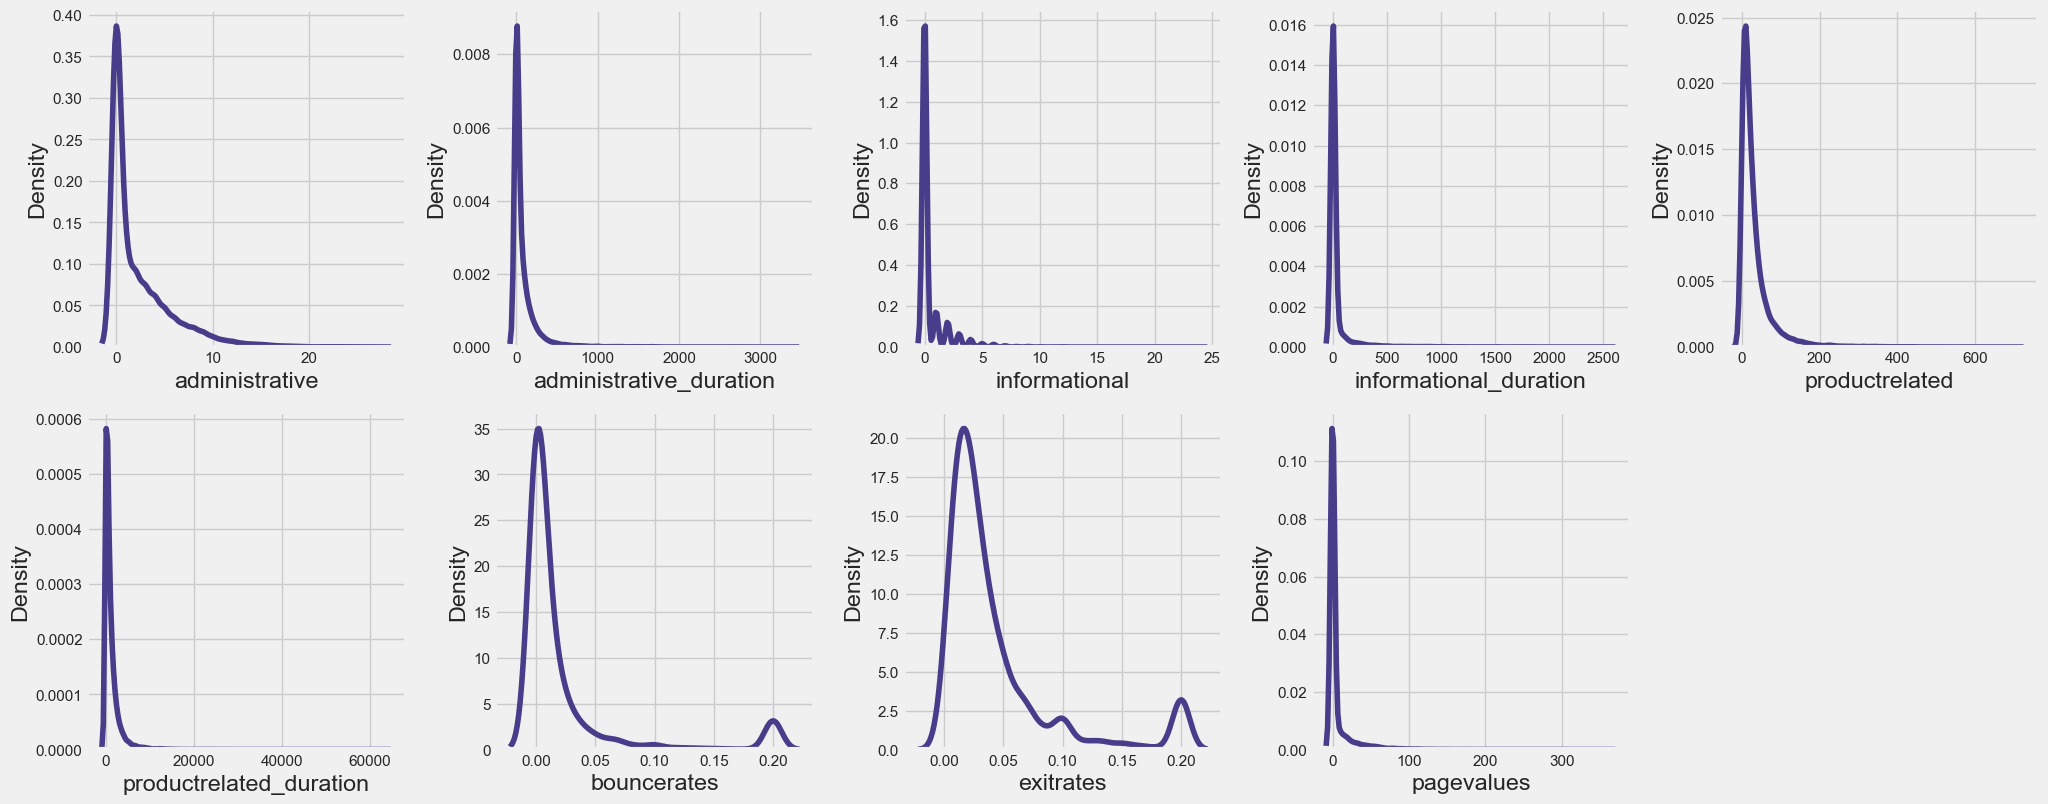

In [18]:
# Distribusi untuk setiap fitur numerik
for i in range(0, len(nums)):
    plt.subplot(2,5, i+1)
    sns.kdeplot(x=raw_ecommerce[nums[i]], color='DarkSlateBlue')
plt.tight_layout()

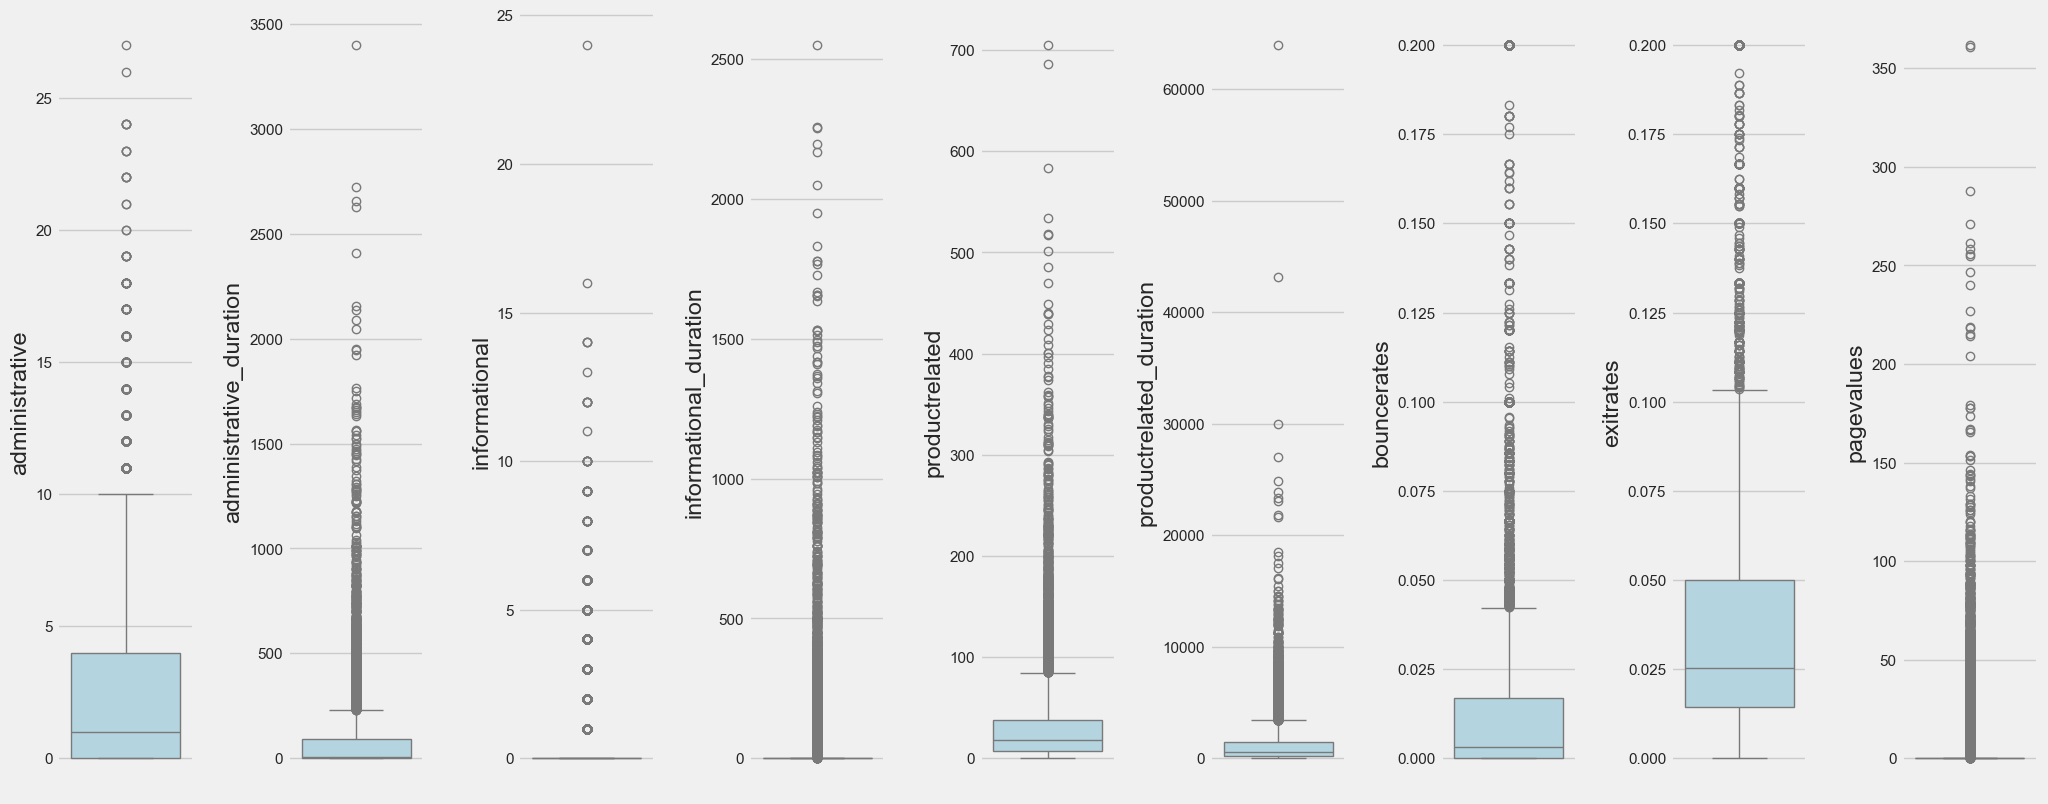

In [19]:
# boxplot untuksetiap fitur numerik
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(data=raw_ecommerce, y=nums[i], color='LightBlue')
plt.tight_layout()

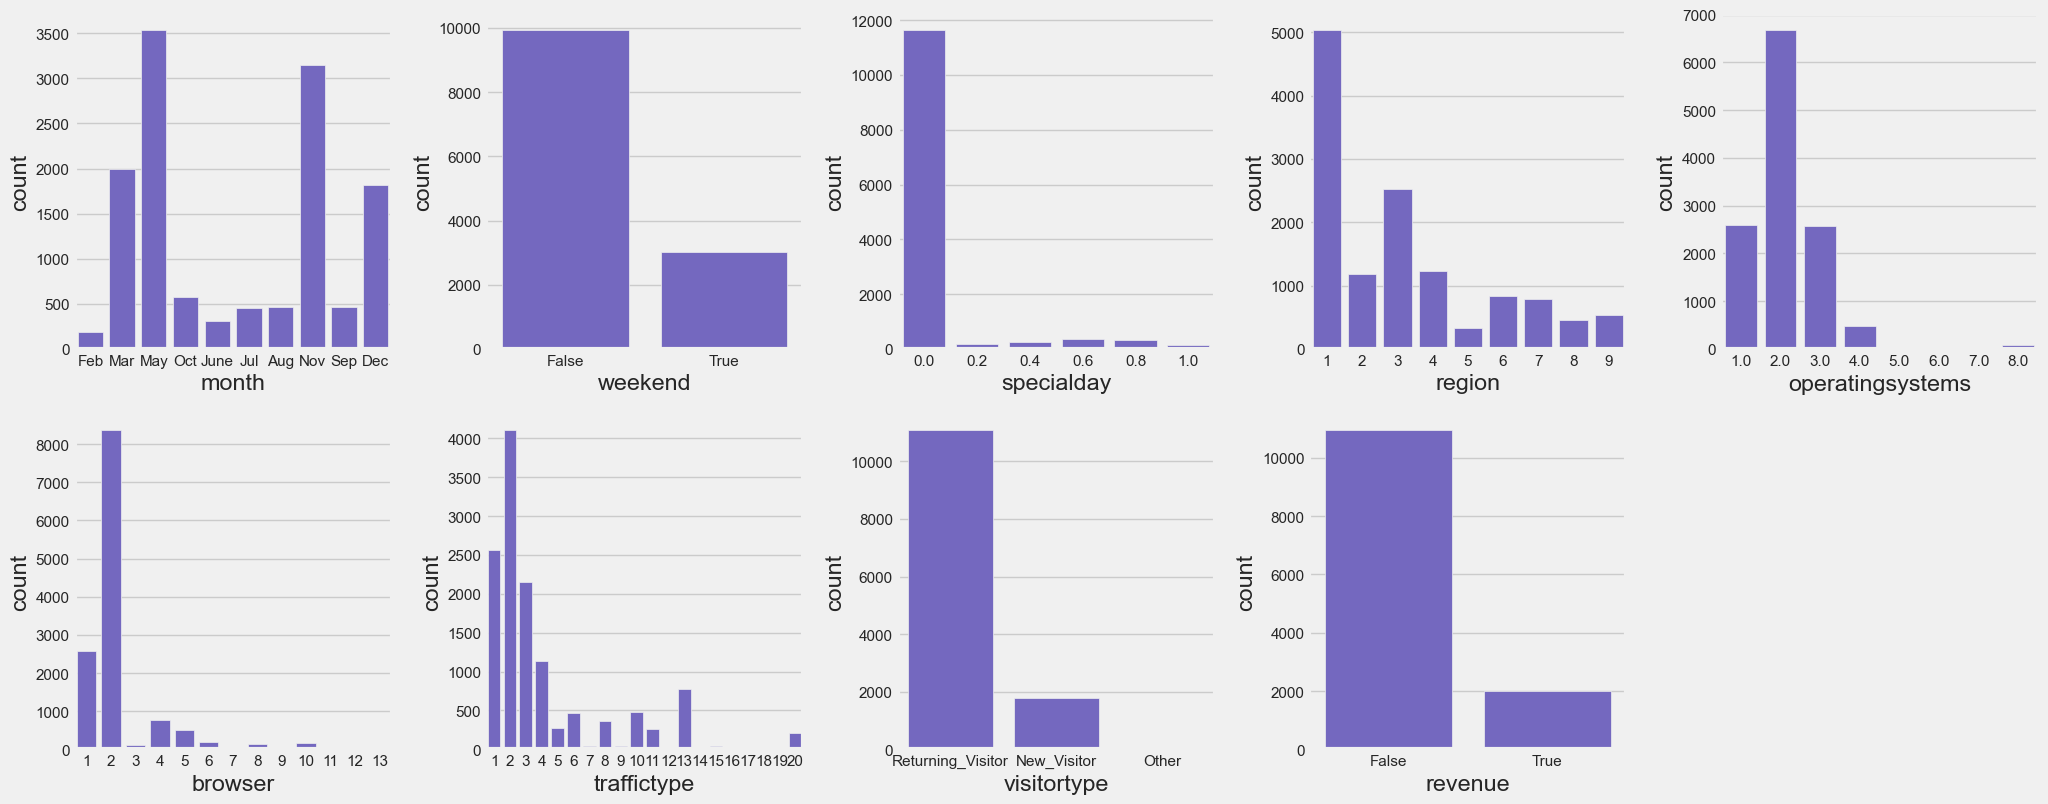

In [20]:
#Count plot untuk setiap fitur kategori
for i in range(0, len(cats)):
    plt.subplot(2,5, i+1)
    sns.countplot(x=raw_ecommerce[cats[i]], color='SlateBlue')
plt.tight_layout()

## 📈 2. Univariate Analysis Insight
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

---
Untuk kolom numerikal berikut ini memiliki distribusi <i>positively skewed</i> dan juga memiliki outlier:
- `administrative`
- `administrative_duration`
- `informational`
- `informational_duration`
- `productrelated`
- `productrelated_duration`
- `bouncerates`
- `exitrates`
- `pagevalues`

Untuk tahap preprocessing dapat dilakukan, `handling outlier` dan `feature transformation`.

Untuk kolom kategorikal :
- `month` : jumlah data didominasi bulan: May, Nov, Mar, Dec
- `weekend` : didominasi oleh nilai 'False'
- `specialday` : kunjungan situs mayoritas dilakukan saat, jauh dari specialday (hari khusus)
- `region` : observasi menunjukan user region 1 mendominasi
- `operatingsystem` : yang digunakan banyak user 2, 1, 3, 4
- `browser` : jenis 2 mendominasi data dari 13 jenis browser
- `traffictype` : jenis traffic yang paling banyak membawa user merupakan traffic 2, 1, 3
- `visitortype` : kunjungan mayoritas dilakukan oleh returning_visitor
- `revenue` : sebanyak 84.48% dari kunjungan tidak melakakukan pembelian / tidak menghasilkan pendapatan

Untuk kolom revenue sebagai target perlu dilakukan `imbalances handling`\
kolom visitortype dan month, dapat dilakukan `feature encoding` agar dapat dilakukan algoritma korelasi.

## 📊 Multivariate Analysis

<b>Revenue VS Month

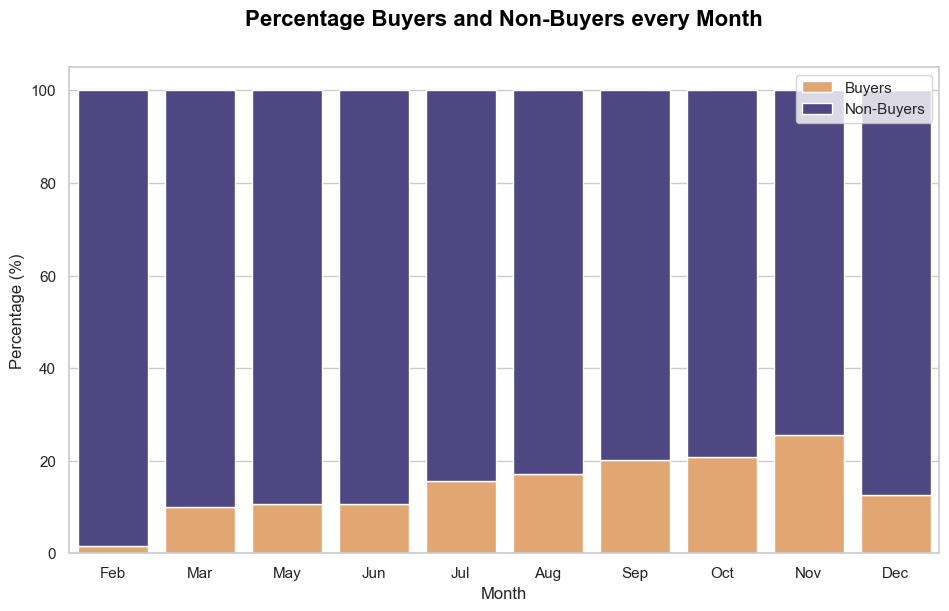

In [59]:
# groupby month
month_revenue       = raw_ecommerce.groupby(['month', 'revenue'])['revenue'].count().reset_index(name='count')

# ubah ke pivot
df_pivot = month_revenue.pivot_table(index='month', columns='revenue', values='count')
df_pivot = df_pivot.reset_index()
df_pivot.columns = ['month', 'non buyer', 'buyer']

# sorted bulan agar berurutan
df_pivot.loc[df_pivot['month'] == 'June', 'month'] = 'Jun'
month_order = ['Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_pivot['month'] = pd.Categorical(df_pivot['month'], categories=month_order, ordered=True)
df_pivot_sorted = df_pivot.sort_values(by='month')

# ubah month menjadi index
df_pivot_sorted.set_index('month', inplace=True)

# Menghitung total untuk setiap bulan
df_pivot_sorted['total'] = df_pivot_sorted['non buyer'] + df_pivot_sorted['buyer']

# Menghitung persentase untuk setiap kategori (False dan True)
df_pivot_sorted['non buyer_percent'] = (df_pivot_sorted['non buyer'] / df_pivot_sorted['total']) * 100
df_pivot_sorted['buyer_percent'] = (df_pivot_sorted['buyer'] / df_pivot_sorted['total']) * 100

# Menggambar stacked bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=df_pivot_sorted.index, y=df_pivot_sorted['buyer_percent'], color='SandyBrown', label='Buyers')
sns.barplot(x=df_pivot_sorted.index, y=df_pivot_sorted['non buyer_percent'], bottom=df_pivot_sorted['buyer_percent'], color='DarkSlateBlue', label='Non-Buyers')

plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.title('Percentage Buyers and Non-Buyers every Month', color='black', fontsize=16, loc='center', weight='bold', pad = 30,)

plt.legend()

plt.show()

Kunjungan user pada platform, yang menghasilkan revenue didominasi pada bulan **November**, Sementara bulan **Februari** memiliki kunjungan yang menghasilkan revenue yang paling sedikit. 

<b>Revenue VS Weekend</b>

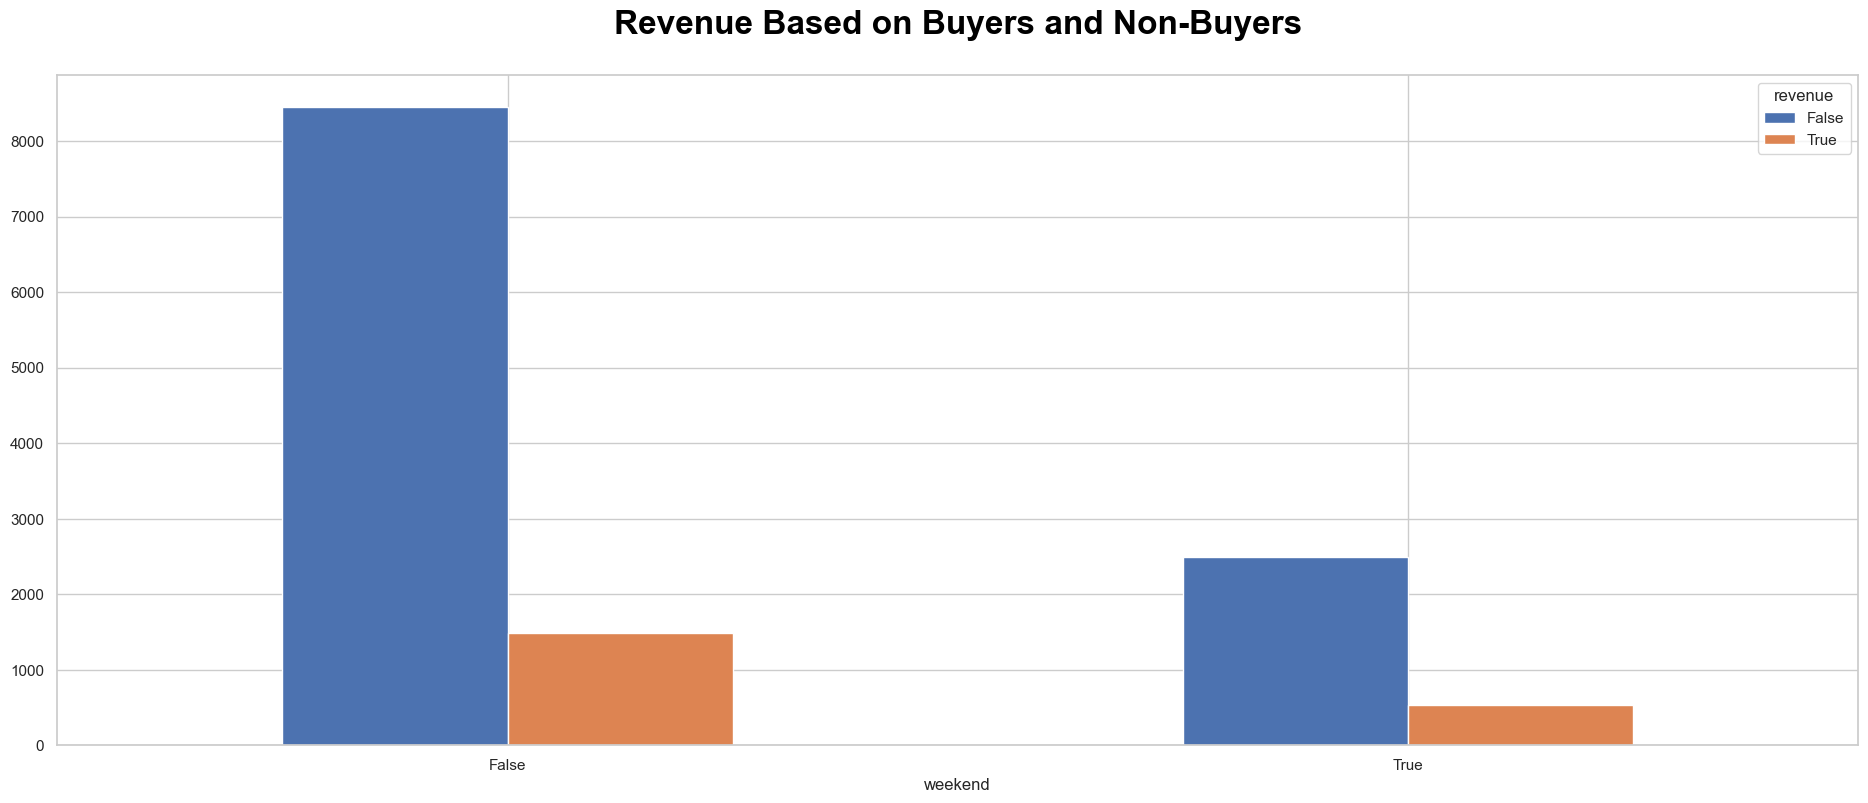

In [65]:
#group by weekend
weekend_revenue       = raw_ecommerce.groupby(['weekend', 'revenue'])['revenue'].count().reset_index(name='count')
weekend_revenue_pivot = weekend_revenue.pivot_table(index='weekend', columns='revenue', values='count')

# buat plot
weekend_revenue_pivot.sort_values(by=[True,False], ascending=False).plot(kind='bar', stacked=False)
plt.xticks(rotation=0)
plt.title('Revenue Based on Buyers and Non-Buyers', color='black', fontsize=24, loc='center', weight='bold', pad = 30,)
plt.show()

In [28]:
weekend_revenue_pivot

revenue,False,True
weekend,,
False,8449,1480
True,2489,528


In [26]:
# weekday revenue rate
weekday = weekend_revenue[weekend_revenue['weekend']==False]
weekday_buyer_revenue = weekday[weekday['revenue'] == True]['count'].sum()
weekday_non_buyer_revenue = weekday[weekday['revenue'] == False]['count'].sum()

weekday_buyer_revenue / weekday_non_buyer_revenue * 100

17.516865901290092

In [35]:
# weekend revenue rate
weekend = weekend_revenue[weekend_revenue['weekend']==True]
weekend_buyer_revenue = weekend[weekend['revenue'] == True]['count'].sum()
weekend_non_buyer_revenue = weekend[weekend['revenue'] == False]['count'].sum()

weekend_buyer_revenue / weekend_non_buyer_revenue * 100

21.213338690237045

Kunjungan user pada weekday lebih tinggi dari weekend tetapi revenue rate yang didapatkan pada weekend lebih tinggi dibandingkan pada weekday (17.51% / 21.21%)

<b>Revenue VS Region</b>

<Axes: ylabel='region'>

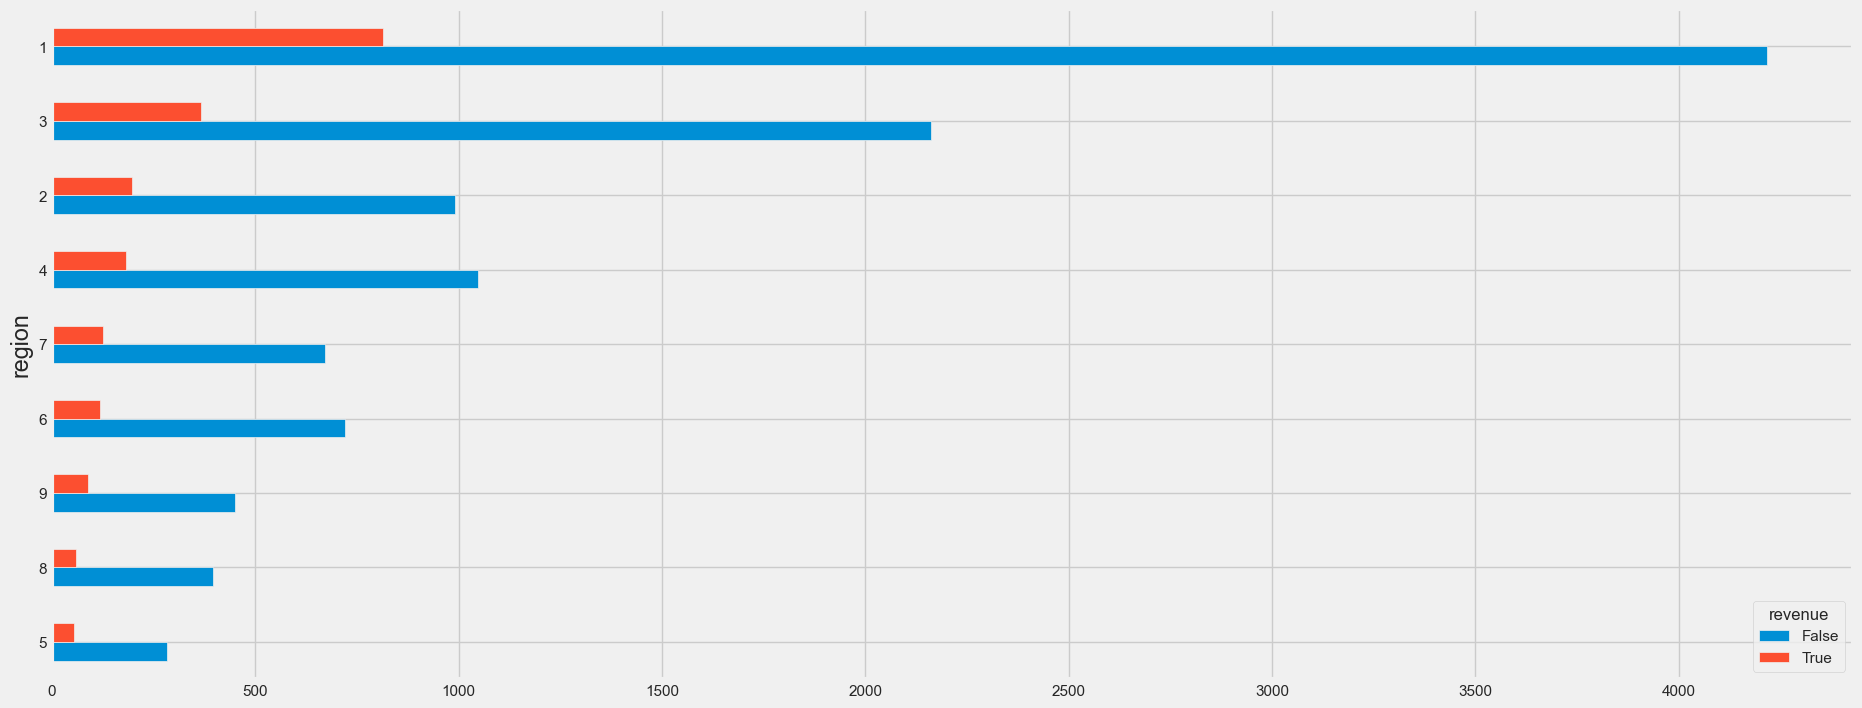

In [42]:
region_revenue       = raw_ecommerce.groupby(['region','revenue'])['revenue'].count().reset_index(name='count')
region_revenue_pivot = region_revenue.pivot_table(index='region',columns='revenue', values='count')

region_revenue_pivot.sort_values(by=[True,False], ascending=True).plot(kind='barh', stacked=False)

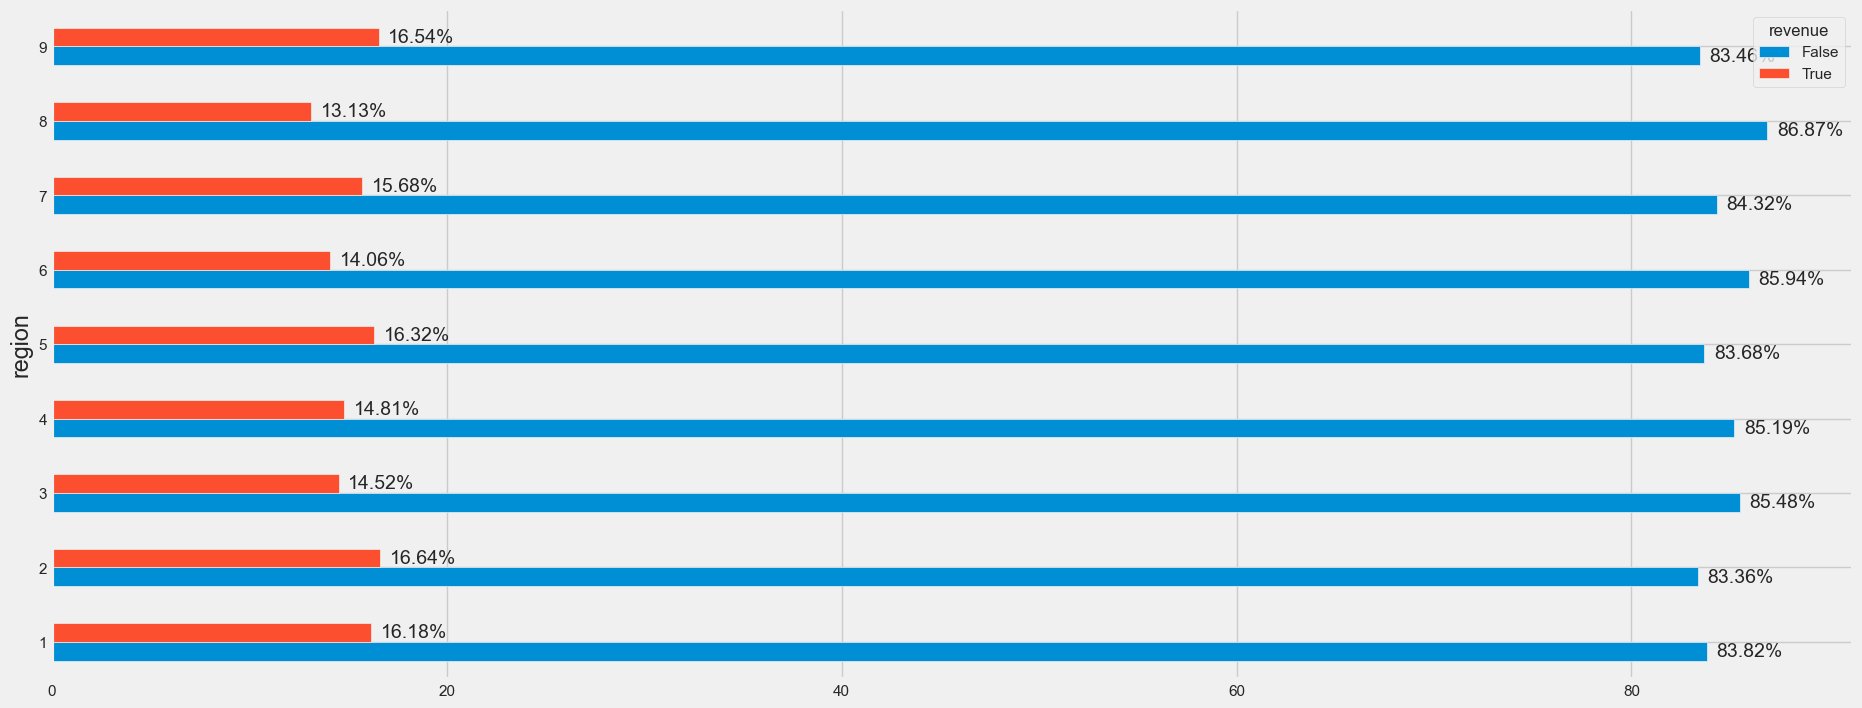

In [44]:
# Calculate the total count of revenue (True and False) for each region
region_revenue['total_count'] = region_revenue.groupby('region')['count'].transform('sum')

# Calculate the revenue rate for each region
region_revenue['revenue_rate'] = (region_revenue['count'] / region_revenue['total_count']) * 100

# Pivot the table to have regions as rows and revenue rates as columns
region_revenue_pivot = region_revenue.pivot_table(index='region', columns='revenue', values='revenue_rate')

# Plot the revenue rates for each region
ax = region_revenue_pivot.plot(kind='barh', stacked=False)

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.5, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha='left', va='center')

# Show the plot
plt.show()

Region 1 memiliki pengunjung paling banyak diantara region lainnya. akan tetapi revenue rate region 9 (16.54%) menjadi paling tinggi diantara region lainnya.

<b>Revenue VS Visitor Type</b>

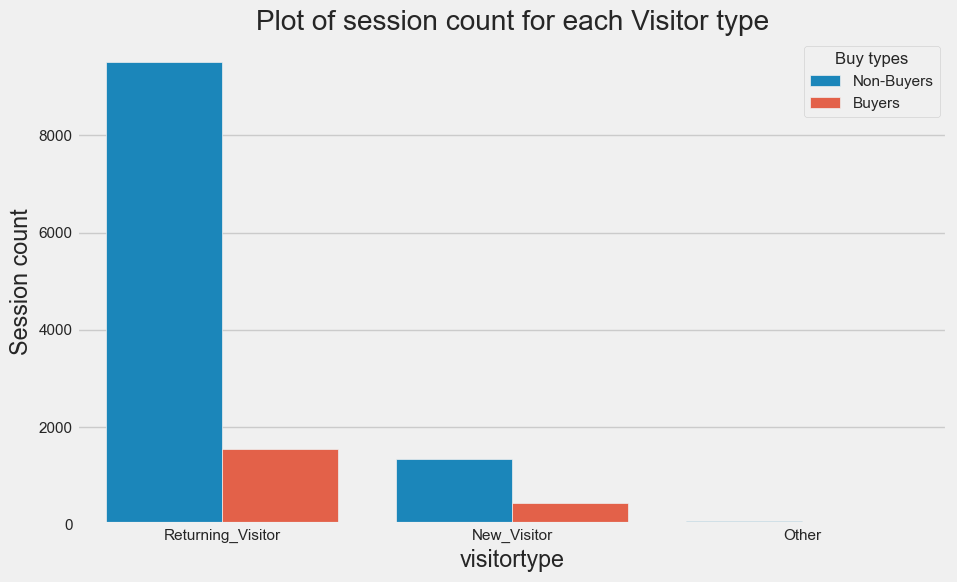

In [11]:
#Group df
visitor_df = raw_ecommerce.groupby(['visitortype', 'revenue'])['revenue'].size().reset_index(name='cnt').sort_values('cnt', ascending=False)

#Change name
visitor_df.loc[visitor_df['revenue']==True, 'revenue']  = 'Buyers'
visitor_df.loc[visitor_df['revenue']==False, 'revenue'] = 'Non-Buyers'

#Plot
plt.figure(figsize=(10, 6))
#colors = sns.color_palette('pastel')[2:4][::-1]
sns.barplot(data=visitor_df, 
            x='visitortype', 
            y='cnt', 
            hue='revenue',
            )
plt.legend(title='Buy types')
plt.ylabel("Session count")
plt.title("Plot of session count for each Visitor type")
plt.show()

Sesi dilakukan mayoritas oleh Returning Visitors. namun, persentase Buyer pada Returning Visitors secara signifikan lebih sedikit dari Non-Buyers. pada New visitor, proporsi Buyers mendekati proporsi Non-Buyers. hal ini menunjukan bahwa

Returning Visitor lebih banyak sesi kunjungannya, tetapi New Visitors mempunyai purchase rate yang lebih tinggi.

<b>Revenue VS Product Related</b>

<Axes: xlabel='productrelated', ylabel='productrelated_duration'>

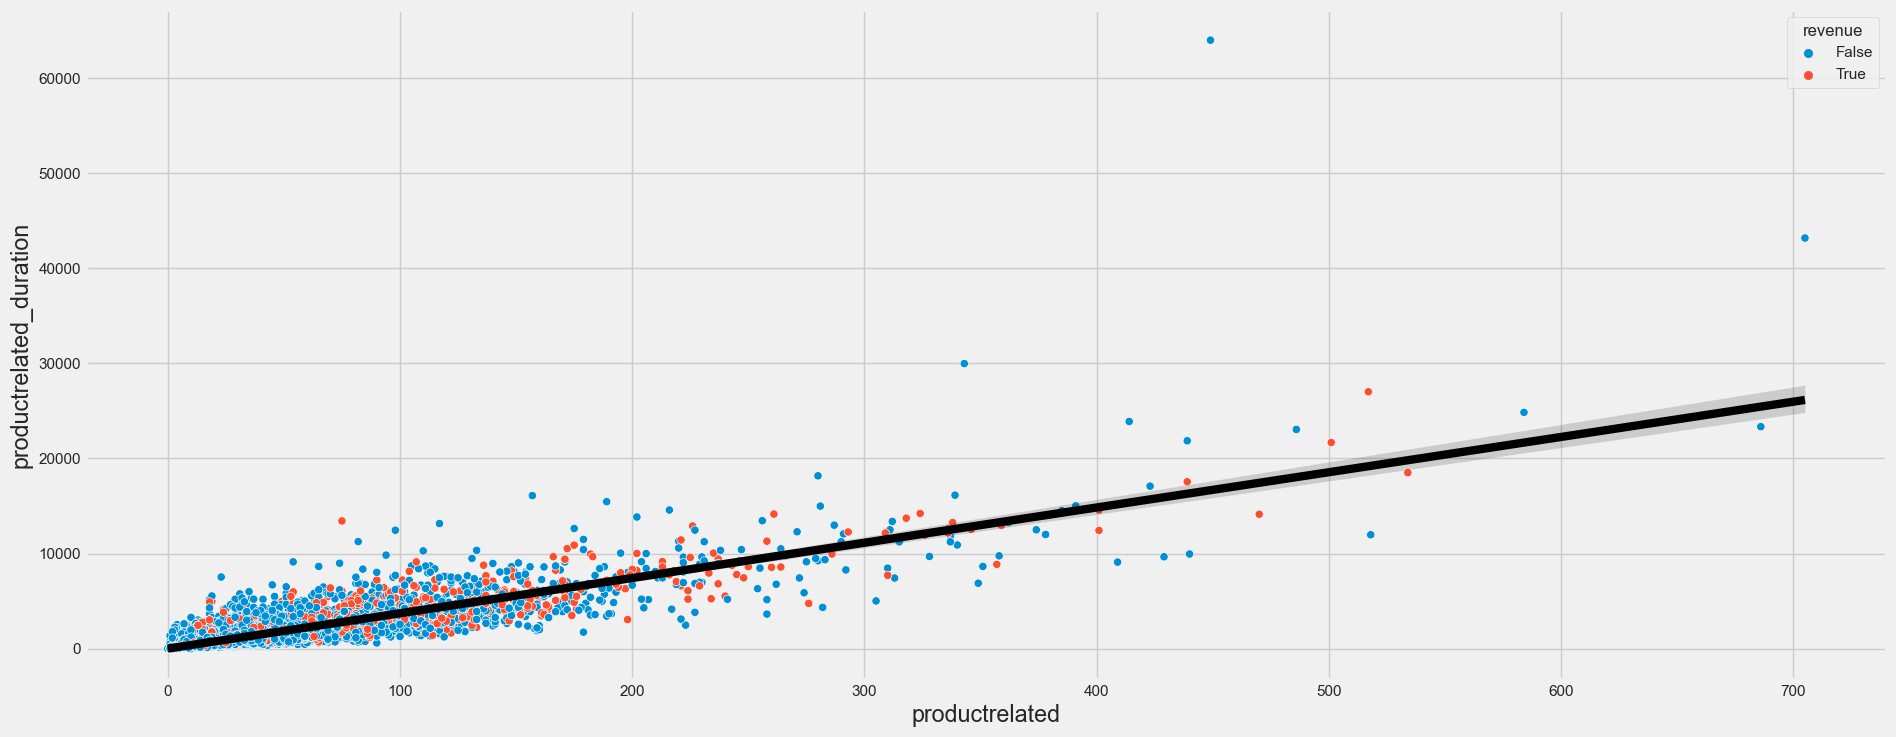

In [13]:
sns.scatterplot(x='productrelated', y='productrelated_duration', hue='revenue', data=raw_ecommerce)
sns.regplot(data=raw_ecommerce, x='productrelated', y='productrelated_duration', scatter=False, color='Black')

ganti distplot

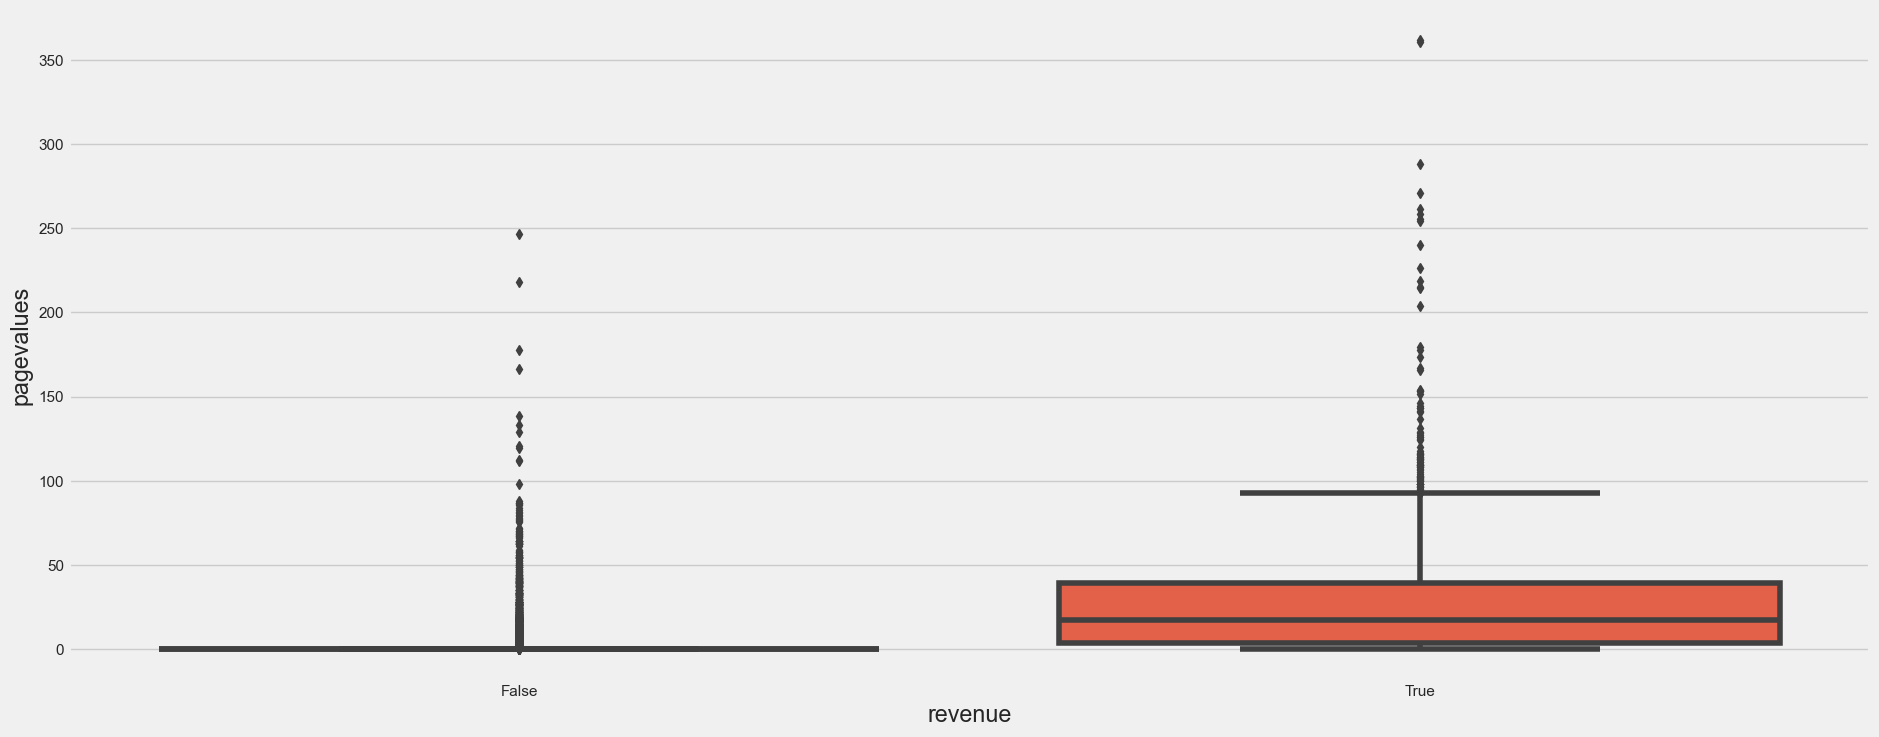

In [47]:
sns.boxplot(data=raw_ecommerce, y='pagevalues', x='revenue')
plt.show()

lihat nilai median/rata"

horizontal

In [68]:
kor = nums +['weekend', 'specialday', 'region', 'operatingsystems', 'browser', 'traffictype', 'revenue']

<Axes: >

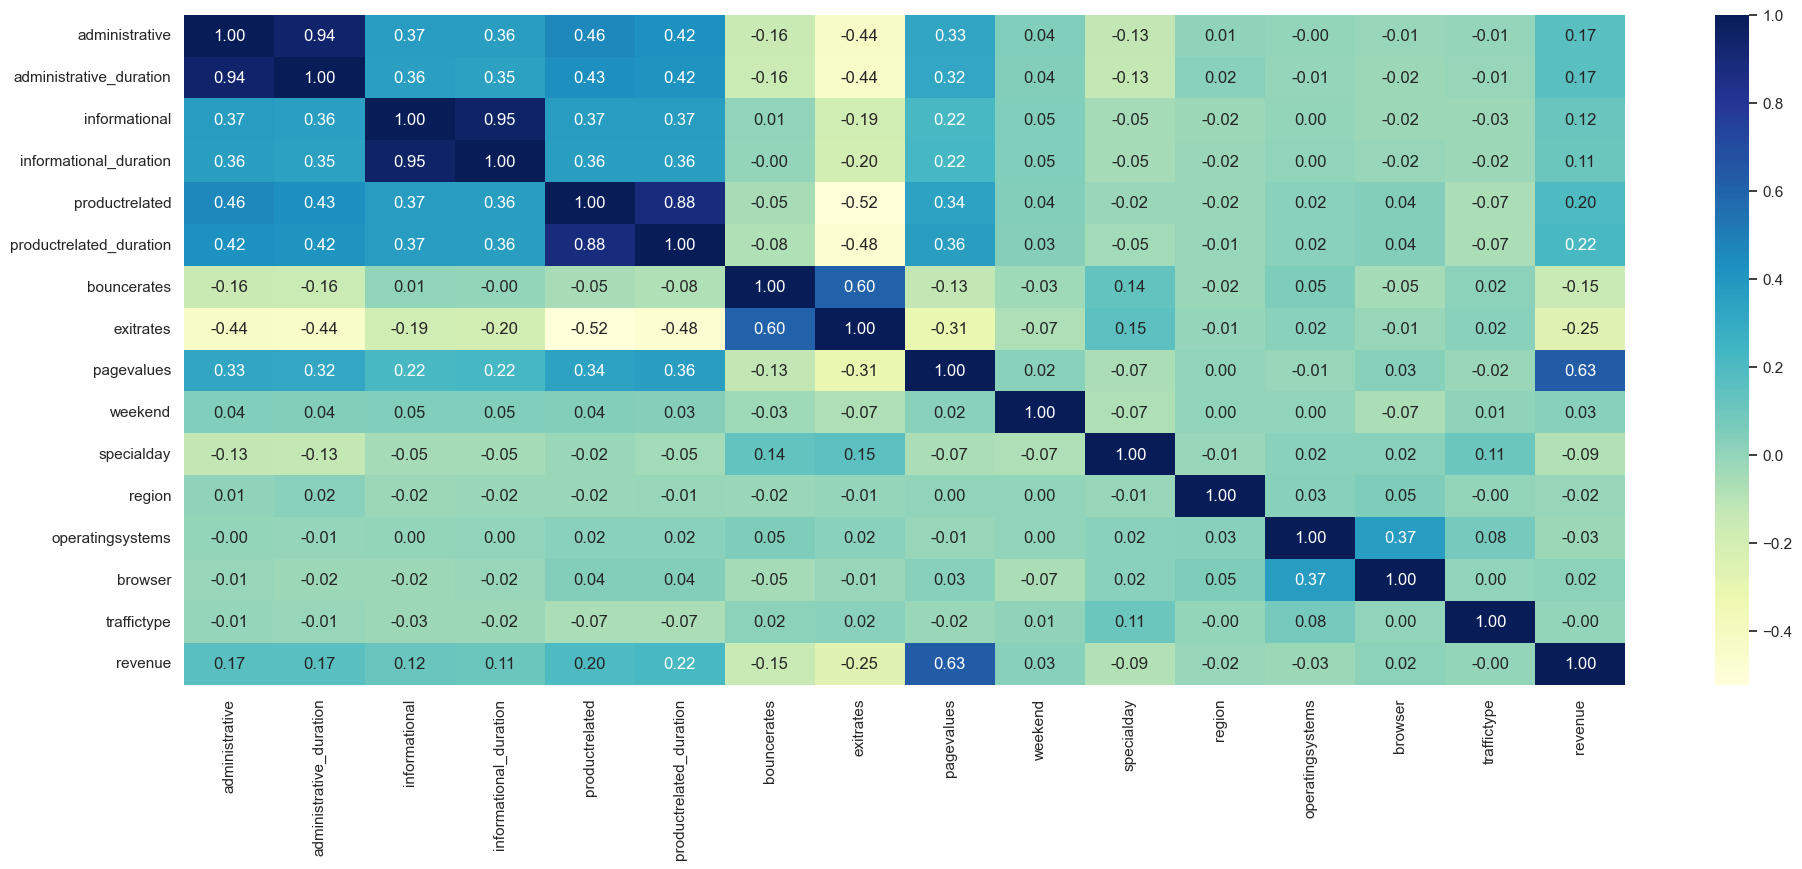

In [69]:
#spearman correlation method
sns.heatmap(raw_ecommerce[kor].corr(method='spearman'), cmap='YlGnBu',annot=True,fmt='.2f')

## 📊 3. Multivariate Analysis Insight

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:
- A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
- B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

---
A. Berdasarkan hasil korelasi heatmap yang ditampilkan, terdapat korelasi antara fitur dengan target (`revenue`) :<br>
1. `revenue` dengan `pagevalues` berkorelasi positive yang cukup tinggi 0.63
2. `revenue` dengan `productrelated` berkorelasi positive 0.20
3. `revenue` dengan `productrelated_duration` berkorelasi positive 0.22
4. `revenue` dengan `administrative` berkorelasi positive 0.17
5. `revenue` dengan `exitrate` berkorelasi negative -0.25
6. `revenue` dengan `bouncrate` berkorelasi negative -0.15

Fitur `pagevalues` memiliki korelasi yang tinggi/*relevan* terhadap target (`revenue`).
<br><br>



B. Berdasarkan hasil korelasi heatmap yang ditampilkan, terdapat beberapa korelasi antar fitur yang cukup tinggi :<br>
1. `productrelated` dengan `productrelated_duration` berkorelasi positive 0.88
2. `administrative` dengan `administrative_duration` berkorelasi positive 0.94
3. `informational` dengan `informational_duration` berkorelasi positive 0.95
4. `bounce_rates` dengan `exitrates` berkorelasi positive 0.60
5. `pagevalues` dengan `productrelated_duration` berkorelasi positive 0.36
6. `browser` dengan `operatingsystem` berkorelasi positive 0.37


Maka antara salah satu fitur yang berkorelasi tinggi, akan di drop berdasarkan korelasi yang rendah terhadap target **revenue**.
Ada kemungkinan fitur `month` dan `visitortype` berkorelasi tinggi terhadap target, maka perlu encoding untuk tahap preprocessing dan melihat korelasinya.

## 📖 4. Business Insight & Reccomendation



**Insight**

- Region 1 memiliki pengunjung paling banyak diantara region lainnya. akan tetapi revenue rate region 9 (16.54%) menjadi paling tinggi diantara region lainnya.

- Revenue yang didapatkan dari keseluruhan kunjungan adalah 15.51%. yang mana revenue tersebut mayoritas di hasilkan pada kunjungan bulan November, terdapat 803 kunjungan yang menghasilkan revenue, dari total 3151 kunjungan.

- Bulan May memiliki kunjungan yang paling banyak diantara yang lain terdapat total kunjungan 3533 akan tetapi, hanya 379 dari total kunjungan yang menghasilkan revenue.

- Kunjungan user pada weekday lebih tinggi dari weekend tetapi revenue rate yang didapatkan pada weekend lebih tinggi dibandingkan pada weekday (17.51% / 21.21%)

- Sesi dilakukan mayoritas oleh Returning Visitors. namun, persentase Buyer pada Returning Visitors secara signifikan lebih sedikit dari Non-Buyers. pada New visitor, proporsi Buyers mendekati proporsi Non-Buyers. hal ini menunjukan bahwa Returning Visitor lebih banyak sesi kunjungannya, tetapi New Visitors mempunyai purchase rate yang lebih tinggi.

- User yang melihat pagevalues lebih dari nilai 0, memutuskan untuk melakukan pembelian.

- productrelated dan memiliki korelasi yang tinggi terhadap revenue

---

**Business Recommendation**

- untuk region yang masih rendah nilai revenue_rate nya, tim marketing dapat menampilkan halaman web yang memiliki pagavalues yang tinggi, dan juga menampilkan rekomendasi yang relevan dengan halaman web yang yang dikunjungi user (product related). strategi marketing tersebut dapat dilakukan pada weekend, dikarenakan disaat weekend revenue_rate lebih tinggi dibandingkan weekday. maka hal ini dapat membantu meningkatkan revenue platform e-commerce.

---

**Metrics**

- Revenue

---
stacked, percentage visualization for purchase rate

In [32]:
region_revenue_pivot.sort_values(by=[True,False], ascending=False)

revenue,False,True
region,,
1,4217,814
3,2161,367
2,992,198
4,1047,182
7,672,125
6,721,118
9,449,89
8,397,60
5,282,55


In [28]:
weekend_revenue_pivot

revenue,False,True
weekend,,
False,8449,1480
True,2489,528


In [33]:
month_revenue_pivot.sort_values(by=[True,False], ascending=False)

revenue,False,True
month,,
Nov,2348,803
May,3154,379
Dec,1588,228
Mar,1796,201
Oct,455,119
Sep,371,93
Aug,382,79
Jul,381,70
June,275,33
